#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import seaborn as sns

#Load Dataset

In [3]:
dictionary = json.load(open('myfile.json', 'r'))

#Dividing dataset into different DataFrames

In [4]:
last30DayAefi = pd.DataFrame(dictionary['last30DaysAefi'])
print("last30dayaefi\n\n",last30DayAefi)

last7DaysRegistration = pd.DataFrame(dictionary["last7DaysRegistration"])
print("last7daysregistration\n\n",last7DaysRegistration)

last5daySessionStatus = pd.DataFrame(dictionary['last5daySessionStatus'])
print("last5daySessionStatus\n\n",last5daySessionStatus)

getBeneficiariesGroupBy = pd.DataFrame(dictionary['getBeneficiariesGroupBy'])
print("getBeneficiariesGroupBy\n\n",getBeneficiariesGroupBy)

timeWiseTodayRegReport = pd.DataFrame(dictionary["timeWiseTodayRegReport"])
print("timeWiseTodayRegReport\n\n",timeWiseTodayRegReport)

vaccinationDoneByTimeAgeWise = pd.DataFrame(dictionary['vaccinationDoneByTimeAgeWise'])
print("vaccinationDoneByTimeAgeWise\n\n",vaccinationDoneByTimeAgeWise)

last30dayaefi

    vaccine_date  aefi
0    2022-06-27    56
1    2022-06-28    95
2    2022-06-29    60
3    2022-06-30    19
4    2022-07-01    56
5    2022-07-02    11
6    2022-07-03     3
7    2022-07-04    56
8    2022-07-05    12
9    2022-07-06    12
10   2022-07-07   131
11   2022-07-08    46
12   2022-07-09    17
13   2022-07-10   743
14   2022-07-11     9
15   2022-07-12    50
16   2022-07-13    31
17   2022-07-14    11
18   2022-07-15    22
19   2022-07-16   119
20   2022-07-17     1
21   2022-07-18    47
22   2022-07-19    28
23   2022-07-20    18
24   2022-07-21    15
25   2022-07-22    16
26   2022-07-23    12
27   2022-07-24   180
28   2022-07-25     7
29   2022-07-26    17
last7daysregistration

      reg_date   total    male  female  others
0  2022-07-20  163869   83836   79988      45
1  2022-07-21  242040  123217  118740      83
2  2022-07-22  180804   92835   87905      64
3  2022-07-23  146309   76332   69931      46
4  2022-07-24  118793   59336   59417      40
5 

#Plotting Graph: Vaccine Date vs AEFI

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

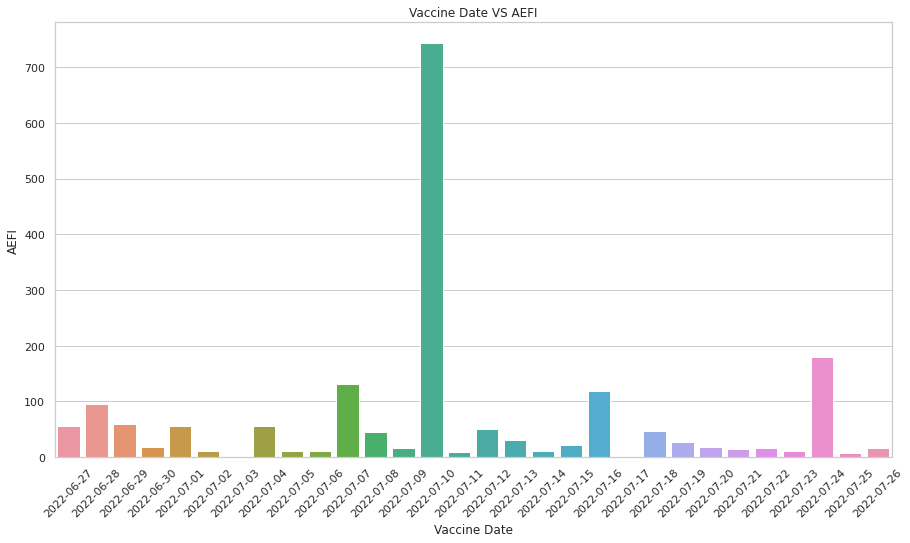

In [5]:
# Plotting a bar chart
sns.set_theme(style="whitegrid")
plt.figure(figsize = (15,8))
ax = sns.barplot(y="aefi", x="vaccine_date", data=last30DayAefi)
plt.xlabel("Vaccine Date")
plt.ylabel("AEFI")
plt.title('Vaccine Date VS AEFI')
plt.xticks(rotation=45)

#Plotting Graph: Last 7-day Registrations

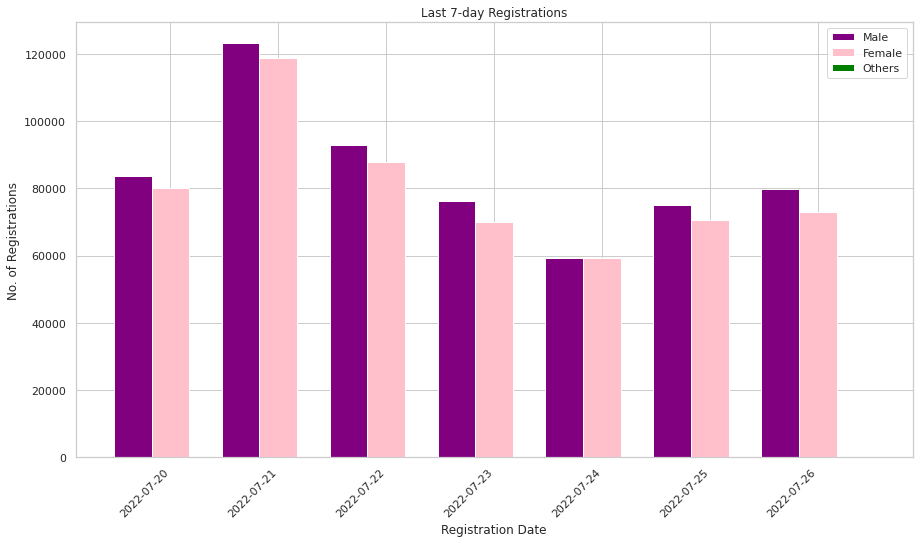

In [6]:
x = np.arange(7)
y1 = last7DaysRegistration['male']
y2 = last7DaysRegistration['female']
y3 = last7DaysRegistration['others']
width = 0.35
  
# Plotting data in grouped manner of bar type
plt.figure(figsize = (15,8))
plt.bar(x-0.35, y1, width, color='purple')
plt.bar(x, y2, width, color='pink')
plt.bar(x+0.35, y3, width, color='green')
plt.xticks(x, last7DaysRegistration['reg_date'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Registration Date")
plt.ylabel("No. of Registrations")
plt.title('Last 7-day Registrations')
plt.legend(["Male", "Female", "Others"])
plt.show()

#Plotting Graph: Last 5-day Session Status

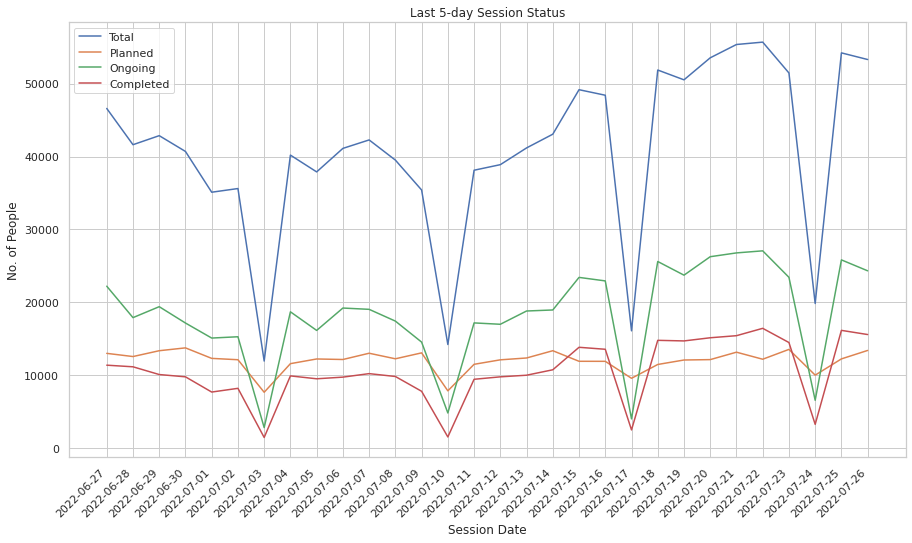

In [7]:
x = last5daySessionStatus['session_date']

# Plotting a multi-line chart
plt.figure(figsize = (15,8))
plt.plot(x, last5daySessionStatus['total'], label = "Total")
plt.plot(x, last5daySessionStatus['planned'], label = "Planned")
plt.plot(x, last5daySessionStatus['ongoing'], label = "Ongoing")
plt.plot(x, last5daySessionStatus['completed'], label = "Completed")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Session Date")
plt.ylabel("No. of People")
plt.title('Last 5-day Session Status')
plt.legend()
plt.show()

#Plotting Graph: Heatmaps for India

##Install geopandas to read shape (shp) file of India's map

In [8]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 11.7 MB/s 
     |████████████████████████████████| 6.3 MB 32.2 MB/s 
     |████████████████████████████████| 16.7 MB 370 kB/s 


## Re-naming states according to Indian_states.shp file

In [9]:
getBeneficiariesGroupBy.at[0,'title']='Andaman & Nicobar Island'
getBeneficiariesGroupBy.at[2,'title']='Arunanchal Pradesh'
getBeneficiariesGroupBy.at[7,'title']='Dadara & Nagar Havelli'
getBeneficiariesGroupBy.at[8,'title']='NCT of Delhi'
getBeneficiariesGroupBy.at[13,'title']='Jammu & Kashmir'
getBeneficiariesGroupBy.at[36,'title']='Daman & Diu'

getBeneficiariesGroupBy.at[0,'state_name']='Andaman & Nicobar Island'
getBeneficiariesGroupBy.at[2,'state_name']='Arunanchal Pradesh'
getBeneficiariesGroupBy.at[7,'state_name']='Dadara & Nagar Havelli'
getBeneficiariesGroupBy.at[8,'state_name']='NCT of Delhi'
getBeneficiariesGroupBy.at[13,'state_name']='Jammu & Kashmir'
getBeneficiariesGroupBy.at[36,'state_name']='Daman & Diu'

## Importing library & reading the shape file

In [10]:
import geopandas as gpd
shp_gdf = gpd.read_file('Indian_states.shp')
shp_gdf

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


## Merging data file and shape file based on names of Indian states

In [11]:
merged = shp_gdf.set_index('st_nm').join(getBeneficiariesGroupBy.set_index('title'))
merged

,geometry,state_id,id,state_name,total,partial_vaccinated,totally_vaccinated,precaution_dose,today
st_nm,,,,,,,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",1,1,Andaman & Nicobar Island,754154,345155,347430,61569,5308
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",3,3,Arunanchal Pradesh,1794807,946382,791186,57239,2163
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",4,4,Assam,48244196,24615530,21699600,1929066,76246
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",5,5,Bihar,141845336,71996789,63555410,6293137,74398
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",6,6,Chandigarh,2221943,1180741,973062,68140,2120
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",7,7,Chhattisgarh,43210936,20993154,19444768,2773014,134292
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",8,8,Dadara & Nagar Havelli,846456,459736,350145,36575,3922
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",37,37,Daman & Diu,628026,319056,276509,32461,4064
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",10,10,Goa,2810265,1436744,1287885,85636,2174


## India's heatmap for partial vaccination

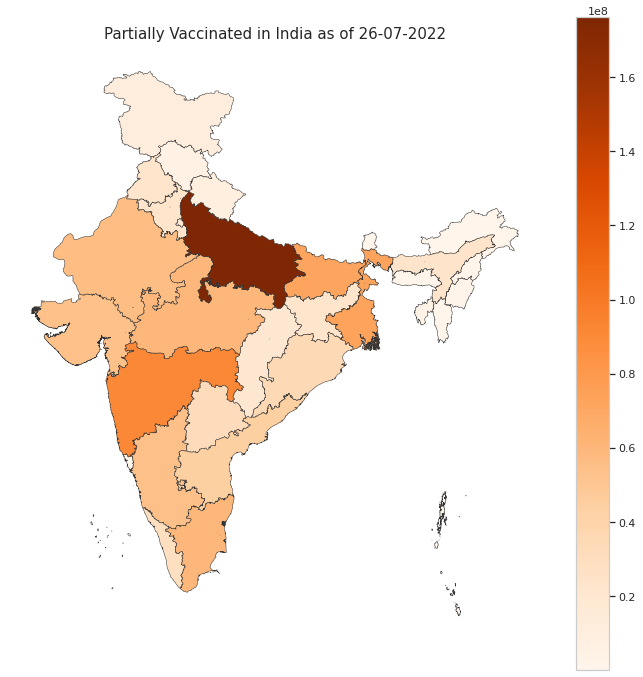

In [12]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Partially Vaccinated in India as of 26-07-2022', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='partial_vaccinated', cmap='Oranges', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

## India's heatmap for total vaccination

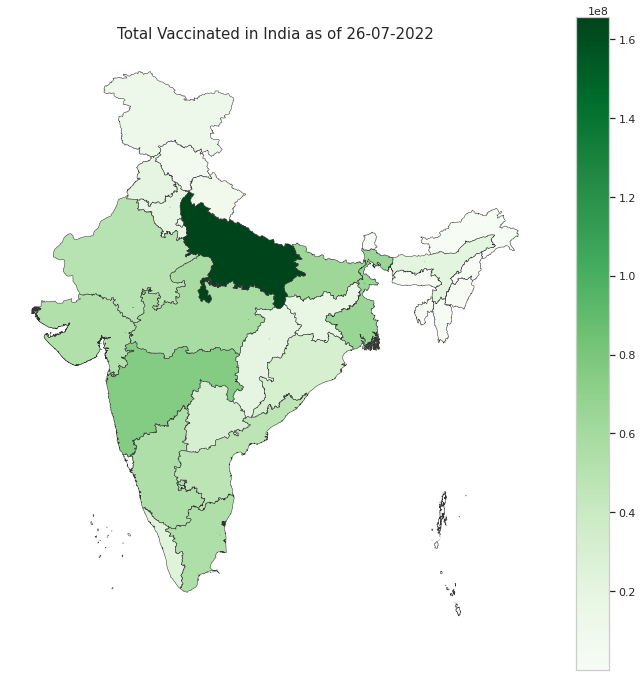

In [13]:
# Plotting totally_vaccinated
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Total Vaccinated in India as of 26-07-2022', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='totally_vaccinated', cmap='Greens', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

## India's heatmap for precaution dose

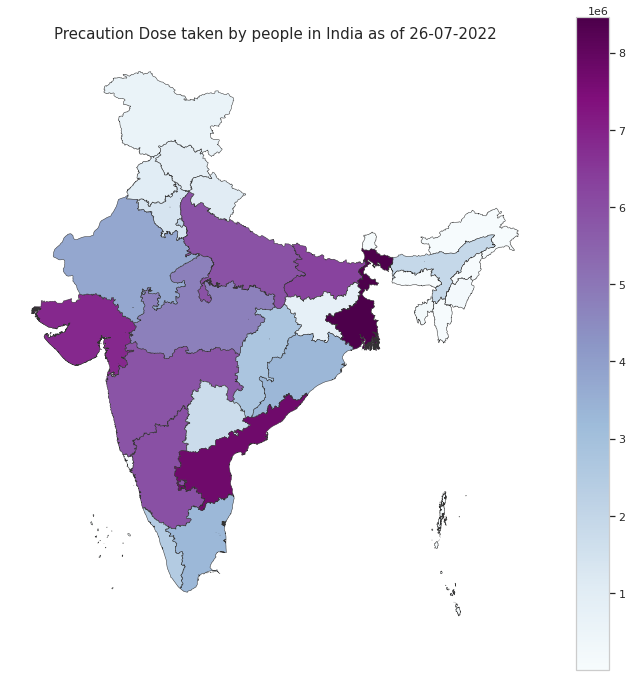

In [14]:
# Plotting precaution_dose	
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Precaution Dose taken by people in India as of 26-07-2022', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='precaution_dose', cmap='BuPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

## India's heatmap for total vaccinations

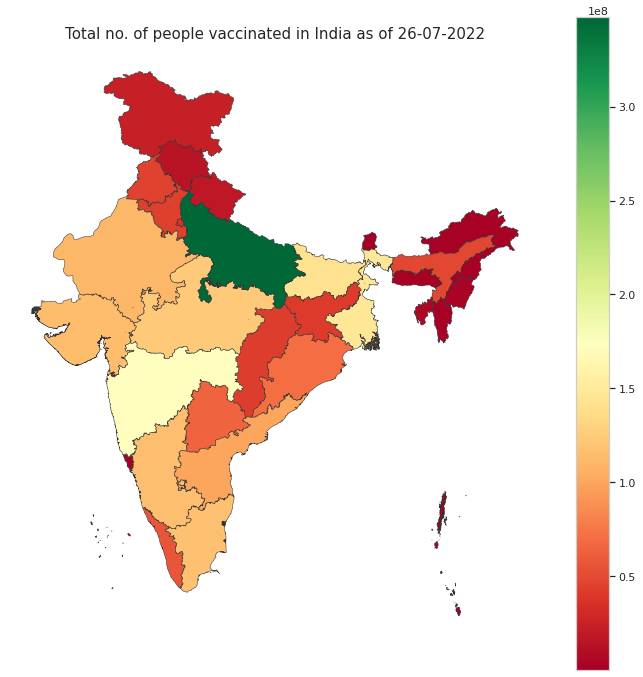

In [15]:
# Plotting total	
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Total no. of people vaccinated in India as of 26-07-2022', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='total', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)